# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetting marketting ads on facebook.
The company wants to analyze the customer behavior by predicting which customer clicks on the advertisement.
Customer data is as follows:

# STEP#0: IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [3]:
pd.read_csv('Facebook_Ads_2.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 4001: invalid continuation byte

In [4]:
#Needs to input the encoding argument, otherwise this would throw an error
training_set = pd.read_csv('Facebook_Ads_2.csv', encoding='iso-8859-1')
training_set

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [5]:
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [6]:
training_set.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [7]:
training_set.shape

(499, 6)

# STEP #2: EXPLORE/VISUALIZE DATA

In [8]:
training_set[training_set.Clicked == 1]

,Names,emails,Country,Time Spent on Site,Salary,Clicked
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
...,...,...,...,...,...,...
486,Cheryl,iaculis.enim@nislelementum.edu,Indonesia,41.544304,55792.69851,1
487,Courtney,porttitor.tellus@elitelit.org,Malaysia,43.281586,54123.64650,1
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1


In [9]:
training_set[training_set.Clicked == 0]

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0
...,...,...,...,...,...,...
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0


In [10]:
click = training_set[training_set.Clicked == 1]

In [11]:
no_click = training_set[training_set.Clicked == 0]

In [12]:
type(click.head), type(click.head())

(method, pandas.core.frame.DataFrame)

In [13]:
print(f"Total = {len(training_set)}")
print(f"Number of customer who clicked on Ad = {len(click)}")
print(f"Percentage Clicked = {round(len(click)/len(training_set),3) *100.0} %")
print(f"Did not Click = {len(no_click)}")
print(f"Percentage who did not click = {round((len(no_click)/len(training_set)),5)*100.0}")

Total = 499
Number of customer who clicked on Ad = 250
Percentage Clicked = 50.1 %
Did not Click = 249
Percentage who did not click = 49.9


In [14]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

In [15]:
training_set.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

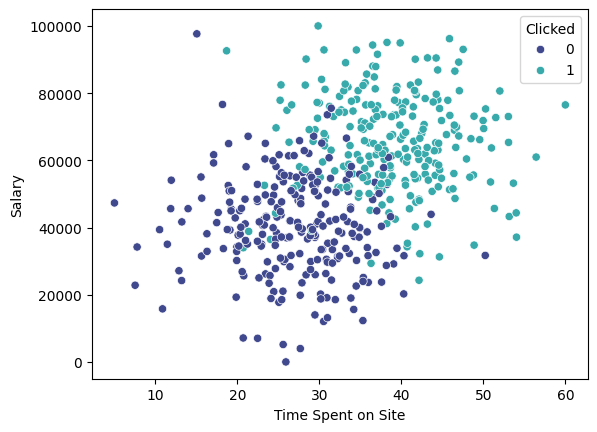

In [16]:
sns.scatterplot(x='Time Spent on Site', y = 'Salary', data=training_set, palette='mako', hue = 'Clicked')

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

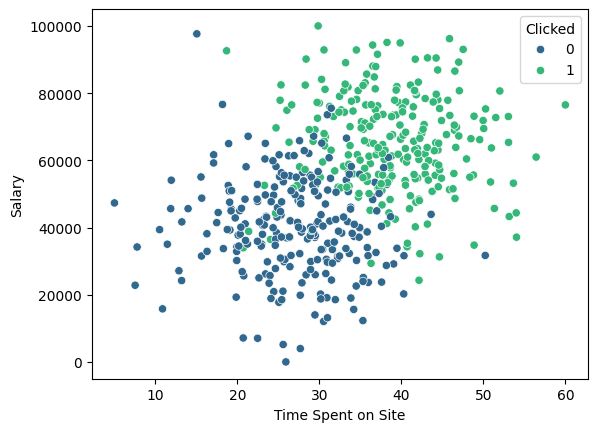

In [17]:
sns.scatterplot(x='Time Spent on Site', y='Salary', data=training_set, hue='Clicked', palette='viridis')

In [19]:
?sns.boxplot

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

<Axes: xlabel='Clicked', ylabel='Salary'>

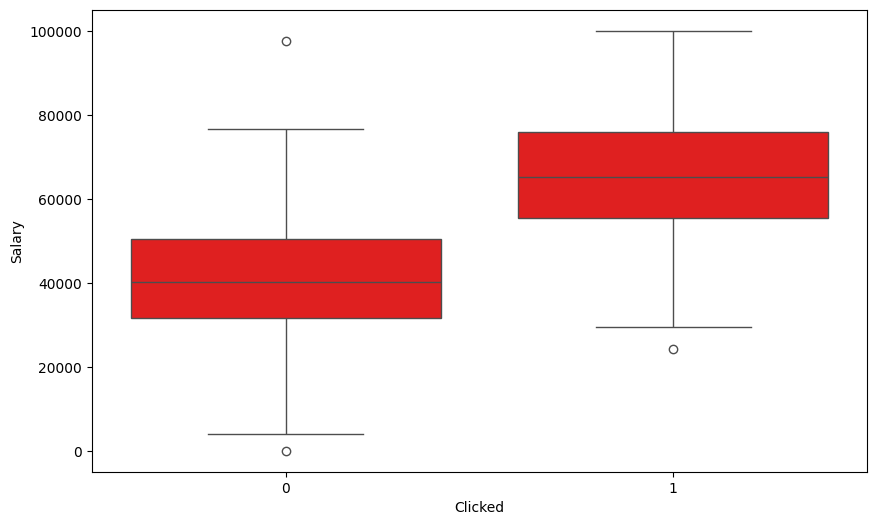

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Clicked', y='Salary', data=training_set, color='red')

/tmp/ipykernel_1738/1168733497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked', y='Salary', data=training_set, palette='mako')


<Axes: xlabel='Clicked', ylabel='Salary'>

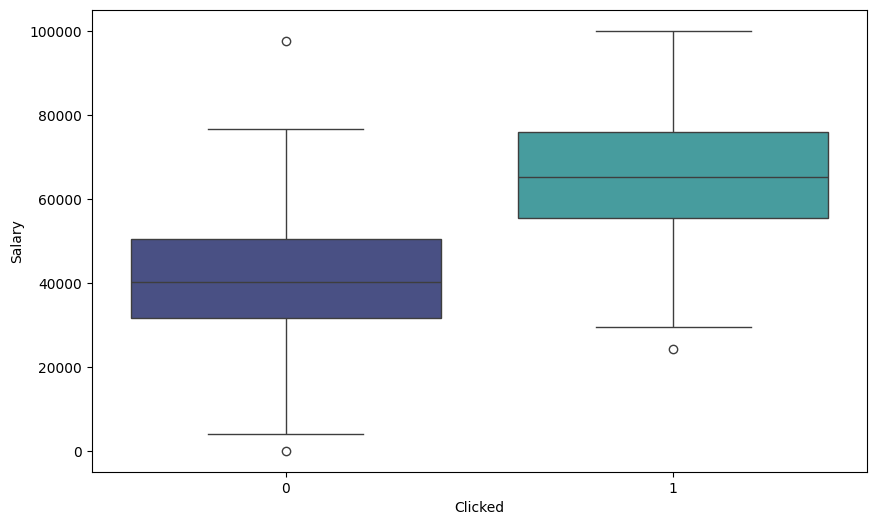

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Clicked', y='Salary', data=training_set, palette='mako')

In [22]:
training_set.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

/tmp/ipykernel_1738/96074365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked', y='Time Spent on Site', data=training_set, palette='pastel')


<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

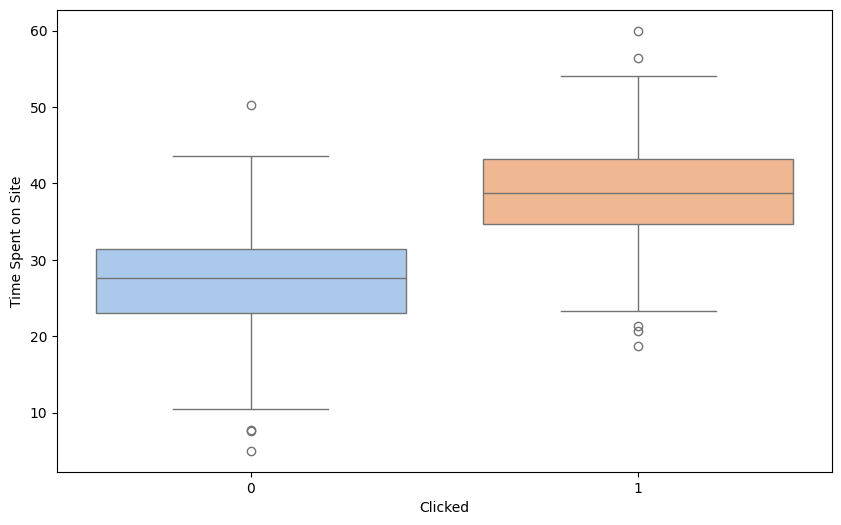

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Clicked', y='Time Spent on Site', data=training_set, palette='pastel')

<Axes: xlabel='Salary', ylabel='Count'>

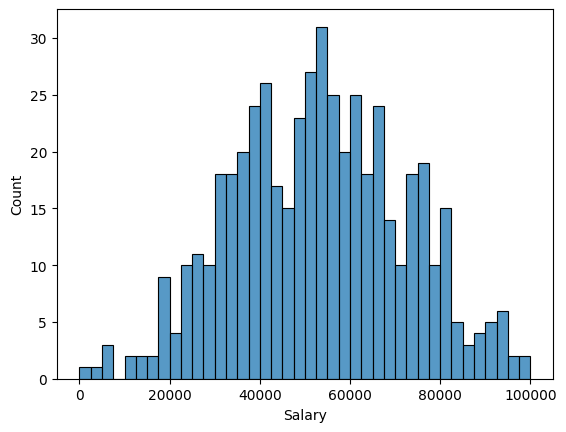

In [26]:
sns.histplot(x='Salary', data=training_set, bins=40)

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

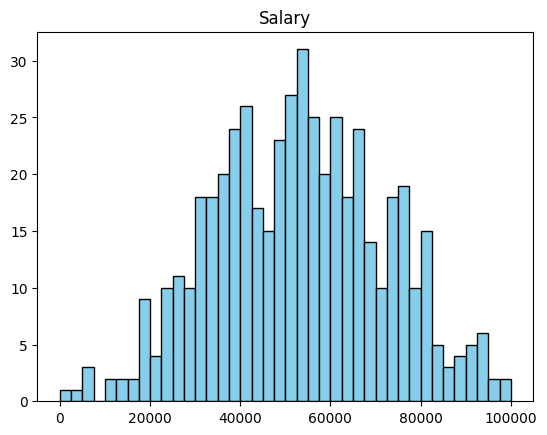

In [31]:
training_set.hist(column='Salary', bins=40, edgecolor='k', grid=False, color='skyblue')

In [32]:
training_set.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

<Axes: xlabel='Time Spent on Site', ylabel='Count'>

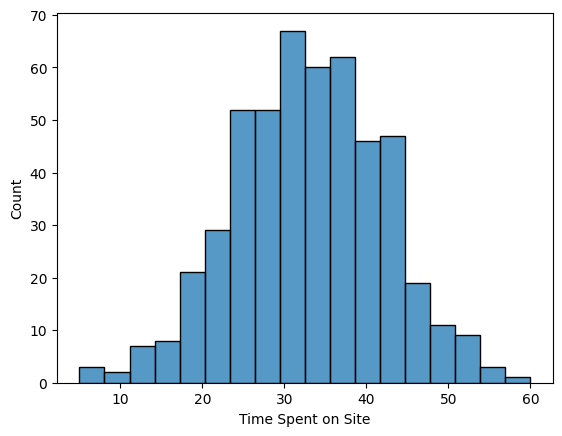

In [33]:
sns.histplot(x='Time Spent on Site', data=training_set)

# STEP #3: PREPARE THE DATA FOR TRAINING/DATA CLEANING

In [34]:
training_set

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [35]:
training_set.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

In [36]:
?training_set.drop

Signature:
training_set.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single lab

In [37]:
cols_to_drop = ['Names', 'emails', 'Country']

In [43]:
training_set.drop(columns=cols_to_drop, axis=1, inplace=True)

In [44]:
training_set

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [50]:
X = training_set.drop(columns='Clicked').values
y = training_set['Clicked'].values

In [51]:
X[:5]

array([[2.56496480e+01, 5.53300601e+04],
       [3.24561067e+01, 7.90490767e+04],
       [2.09459779e+01, 4.10986083e+04],
       [5.40393248e+01, 3.71433554e+04],
       [3.42497288e+01, 3.73551128e+04]])

In [52]:
X.shape, y.shape

((499, 2), (499,))

In [53]:
type(X)

numpy.ndarray

In [54]:
X.ndim, y.ndim

(2, 1)

In [59]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [63]:
X[:5]

array([[-0.79945766,  0.12825771],
       [-0.05102869,  1.37859159],
       [-1.31666684, -0.62194482],
       [ 2.3222327 , -0.83044362],
       [ 0.14619557, -0.81928096]])

# STEP#$: MODEL TRAINING

In [64]:
from sklearn.model_selection import train_test_split

In [68]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [71]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((399, 2), (100, 2), (399,), (100,))

In [73]:
X_train[:5]

array([[1.42362615, 2.2829456 ],
       [1.27842887, 0.64241893],
       [0.93876085, 1.21381549],
       [0.54131478, 0.26063939],
       [1.09531908, 0.4750309 ]])

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [77]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# STEP # 5: MODEL TESTING

In [78]:
dir(classifier)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual'

In [82]:
y_predict = classifier.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

<Axes: >

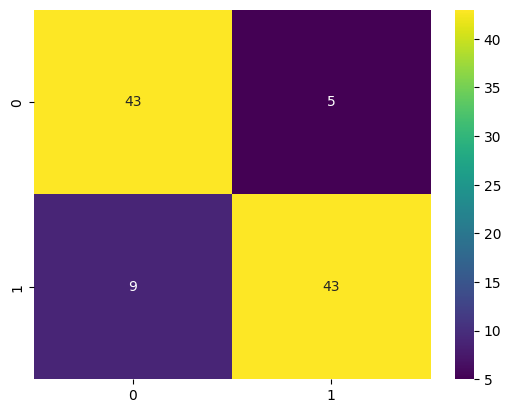

In [86]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='viridis')

<Axes: >

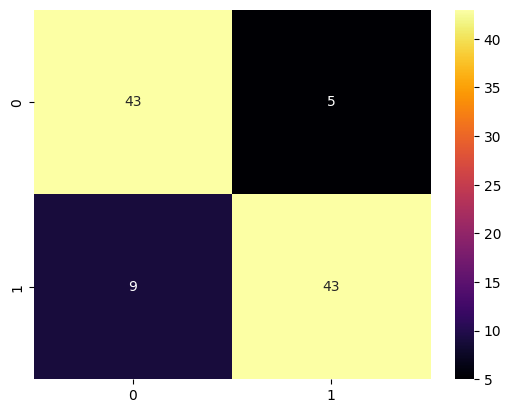

In [89]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')

In [87]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS